In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import pandas as pd
import pylife.stress.timesignal as pts
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.feature_extraction import settings
from tsfresh.utilities.dataframe_functions import impute

###  load time series

,HU_P1_A1S_155892_X,HU_P1_A2S_155892_Y,HU_P1_YRS_155892_Z,HU_P2_A1S_155896_Z,HU_P2_A2S_155896_Y,HU_P2_YRS_155896_X,HU_P3_A1S_173455_X,HU_P3_A2S_173455_Z,HU_P3_YRS_173455_Y,HU_P4_A1S_179194_Z,PCB_P93_A1S_5116_Z,PCB_P93_A2S_5116_Y,PCB_P93_YRS_5116_X
t,,,,,,,,,,,,,
8.78110,0.0,0.0,-1.599539,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,-1.138375,0.000000,0.000000
8.78112,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,-1.138375,0.000000,0.000000
8.78114,0.0,0.0,-1.599539,-1.534716,0.0,0.0,1.447781,0.0,0.0,0.000000,-1.138375,-1.138375,0.000000
8.78116,0.0,0.0,-1.599539,0.000000,0.0,0.0,0.000000,0.0,0.0,-1.378472,0.000000,0.000000,-1.144906
8.78118,0.0,0.0,-1.599539,0.000000,0.0,0.0,0.000000,0.0,0.0,-1.378472,0.000000,0.000000,-1.144906


<AxesSubplot:xlabel='t'>

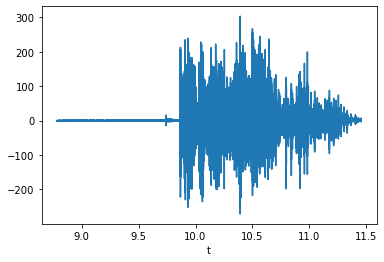

In [2]:
ts_df = pd.read_hdf('ts_example.h5', 'df')
display(ts_df.head())
col = "PCB_P93_A1S_5116_Z"
ts_df[col].plot()

### Add index and time column

In [3]:
ts__pred_df= pts._prepare_rolling(ts_df)
display(ts__pred_df.head())

,HU_P1_A1S_155892_X,HU_P1_A2S_155892_Y,HU_P1_YRS_155892_Z,HU_P2_A1S_155896_Z,HU_P2_A2S_155896_Y,HU_P2_YRS_155896_X,HU_P3_A1S_173455_X,HU_P3_A2S_173455_Z,HU_P3_YRS_173455_Y,HU_P4_A1S_179194_Z,PCB_P93_A1S_5116_Z,PCB_P93_A2S_5116_Y,PCB_P93_YRS_5116_X,id,time
time,,,,,,,,,,,,,,,
0.00000,0.0,0.0,-1.599539,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,-1.138375,0.000000,0.000000,0,0.00000
0.00002,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,-1.138375,0.000000,0.000000,0,0.00002
0.00004,0.0,0.0,-1.599539,-1.534716,0.0,0.0,1.447781,0.0,0.0,0.000000,-1.138375,-1.138375,0.000000,0,0.00004
0.00006,0.0,0.0,-1.599539,0.000000,0.0,0.0,0.000000,0.0,0.0,-1.378472,0.000000,0.000000,-1.144906,0,0.00006
0.00008,0.0,0.0,-1.599539,0.000000,0.0,0.0,0.000000,0.0,0.0,-1.378472,0.000000,0.000000,-1.144906,0,0.00008


### Rolling data set

In [4]:
rolled_df = pts._roll_dataset(ts__pred_df, window_size=1000,overlap=250)
# display(rolled_df.sample(50))

C:\python\pyLife\_venv\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Feature calculation using pyLife

In [5]:
feature = "maximum" # "kurtosis"
feature_df = pts._extract_feature_df(rolled_df, feature=feature)
display(feature_df)

Feature Extraction: 100%|███████████████████████████████████████████████████████| 2301/2301 [00:00<00:00, 11450.74it/s]


,HU_P1_A1S_155892_X__maximum,HU_P1_A2S_155892_Y__maximum,HU_P1_YRS_155892_Z__maximum,HU_P2_A1S_155896_Z__maximum,HU_P2_A2S_155896_Y__maximum,HU_P2_YRS_155896_X__maximum,HU_P3_A1S_173455_X__maximum,HU_P3_A2S_173455_Z__maximum,HU_P3_YRS_173455_Y__maximum,HU_P4_A1S_179194_Z__maximum,PCB_P93_A1S_5116_Z__maximum,PCB_P93_A2S_5116_Y__maximum,PCB_P93_YRS_5116_X__maximum
0,1.661375,1.639413,0.000000,1.534716,1.549197,0.000000,1.447781,1.418177,1.438229,1.378472,0.000000,1.138375,1.144906
1,1.661375,0.000000,0.000000,0.000000,1.549197,0.000000,1.447781,1.418177,1.438229,1.378472,1.138375,1.138375,1.144906
2,1.661375,0.000000,0.000000,0.000000,1.549197,0.000000,1.447781,0.000000,1.438229,1.378472,0.000000,1.138375,1.144906
3,1.661375,1.639413,0.000000,1.534716,4.647592,4.875298,4.343344,2.836355,2.876457,1.378472,1.138375,1.138375,1.144906
4,1.661375,1.639413,0.000000,1.534716,1.549197,1.625099,1.447781,1.418177,1.438229,1.378472,1.138375,1.138375,1.144906
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,6.645498,4.918239,6.398157,9.208295,9.295184,13.000793,14.477813,11.345419,8.629372,8.270829,19.352377,22.767504,9.159250
173,3.322749,3.278826,3.199078,3.069432,3.098395,3.250198,2.895562,1.418177,1.438229,5.513886,9.107001,6.830251,5.724532
174,6.645498,4.918239,6.398157,6.138864,6.196789,11.375694,8.686687,5.672709,5.752914,6.892358,17.075626,10.245377,8.014344
175,3.322749,4.918239,1.599539,4.604147,6.196789,3.250198,4.343344,1.418177,2.876457,4.135415,17.075626,10.245377,6.869438


<AxesSubplot:>

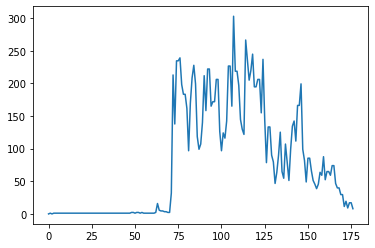

In [6]:
feature_df[col + "__" + feature].plot()

### Feature calculation using tsfresh directly
<span style="color:red">
Remark: On Windows use n_jobs=0 !!!!
</span>

In [7]:
## We could calculate all possible features, but that takes to long
# all_features = extract_features(rolled_df, column_id="id", column_sort="time", impute_function=impute, n_jobs=0)

In [8]:
# but we can use a predefined set of parameters:
# settings.ComprehensiveFCParameters, settings.EfficientFCParameters, settings.MinimalFCParameters
setting = settings.MinimalFCParameters()
features = extract_features(rolled_df, column_id="id", column_sort="time", 
                                default_fc_parameters=settings.MinimalFCParameters(),
                                impute_function=impute, n_jobs=0)

Feature Extraction: 100%|████████████████████████████████████████████████████████| 2301/2301 [00:00<00:00, 4119.93it/s]


In [9]:
display(features)

HU_P1_A1S_155892_X__sum_values  HU_P1_A1S_155892_X__median  \
0 0.019979                        8.306873                         0.0   
  0.034980                        3.322749                         0.0   
  0.049980                        8.306873                         0.0   
  0.064980                      -26.581991                         0.0   
  0.079980                      -79.745979                         0.0   
...                                    ...                         ...   
  2.599979                     -220.962814                         0.0   
  2.614980                     -147.862366                         0.0   
  2.629980                     -347.227325                         0.0   
  2.644979                     -264.158569                         0.0   
  2.659980                     -282.433716                         0.0   

            HU_P1_A1S_155892_X__mean  HU_P1_A1S_155892_X__length  \
0 0.019979                  0.008307                      1000.0   
  0.034980                  0.003323                      1000.0   
  0.049980                  0.008307                      1000.0   
  0.064980                 -0.026582                      1000.0   
  0.079980                 -0.079746                      1000.0   
...                              ...                         ...   
  2.599979                 -0.220963                      1000.0   
  2.614980                 -0.147862                      1000.0   
  2.629980                 -0.347227                      1000.0   
  2.644979                 -0.264159                      1000.0   
  2.659980                 -0.282434                      1000.0   

            HU_P1_A1S_155892_X__standard_deviation  \
0 0.019979                                0.216457   
  0.034980                                0.074225   
  0.049980                                0.117183   
  0.064980                                0.406083   
  0.079980                                0.412664   
...                                            ...   
  2.599979                                2.051855   
  2.614980                                1.383117   
  2.629980                                1.674051   
  2.644979                                1.240724   
  2.659980                                1.514587   

            HU_P1_A1S_155892_X__variance  HU_P1_A1S_155892_X__maximum  \
0 0.019979                      0.046854                     1.661375   
  0.034980                      0.005509                     1.661375   
  0.049980                      0.013732                     1.661375   
  0.064980                      0.164903                     1.661375   
  0.079980                      0.170291                     1.661375   
...                                  ...                          ...   
  2.599979                      4.210111                     6.645498   
  2.614980                      1.913013                     3.322749   
  2.629980                      2.802448                     6.645498   
  2.644979                      1.539397                     3.322749   
  2.659980                      2.293973                     3.322749   

            HU_P1_A1S_155892_X__minimum  HU_P1_A2S_155892_Y__sum_values  \
0 0.019979                    -1.661375                       18.033539   
  0.034980                     0.000000                        0.000000   
  0.049980                     0.000000                        0.000000   
  0.064980                    -3.322749                       -1.639413   
  0.079980                    -1.661375                        1.639413   
...                                 ...                             ...   
  2.599979                   -14.952372                      245.911911   
  2.614980                    -3.322749                       39.345882   
  2.629980                    -6.645498                       73.773529   
  2.644979                    

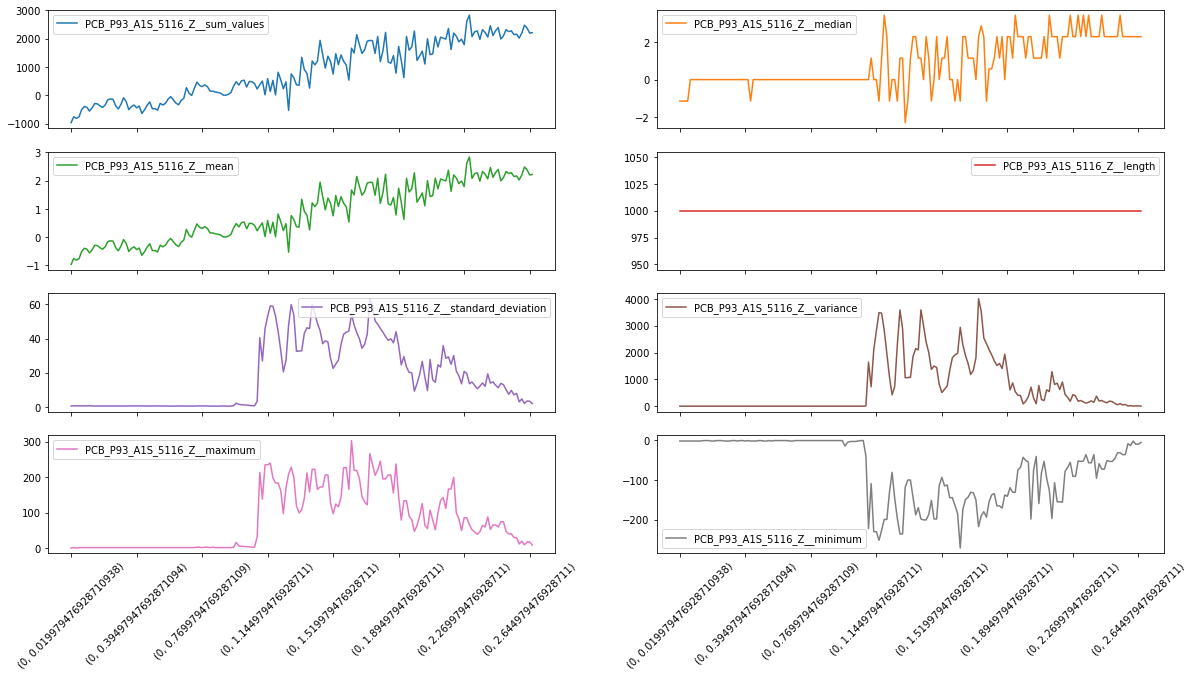

In [10]:
def plot_features(features):
    n_features = len(features.columns[features.columns.str.contains(col)])
    features[features.columns[features.columns.str.contains(col)]].plot(subplots=True,sharex=True,
                                                                        layout=(int(np.ceil(n_features/2)),2),rot=45,
                                                                        figsize=(20,10))
    return 
plot_features(features)

In [11]:
# or we create our own feature selection:
setting = {'kurtosis': None, 'skewness': None, 'standard_deviation': None,
           'abs_energy':None, 'maximum': None, 'minimum': None}
features = extract_features(rolled_df, column_id="id", column_sort="time", 
                                default_fc_parameters=setting,
                                impute_function=impute, n_jobs=0)

Feature Extraction: 100%|████████████████████████████████████████████████████████| 2301/2301 [00:00<00:00, 2636.75it/s]


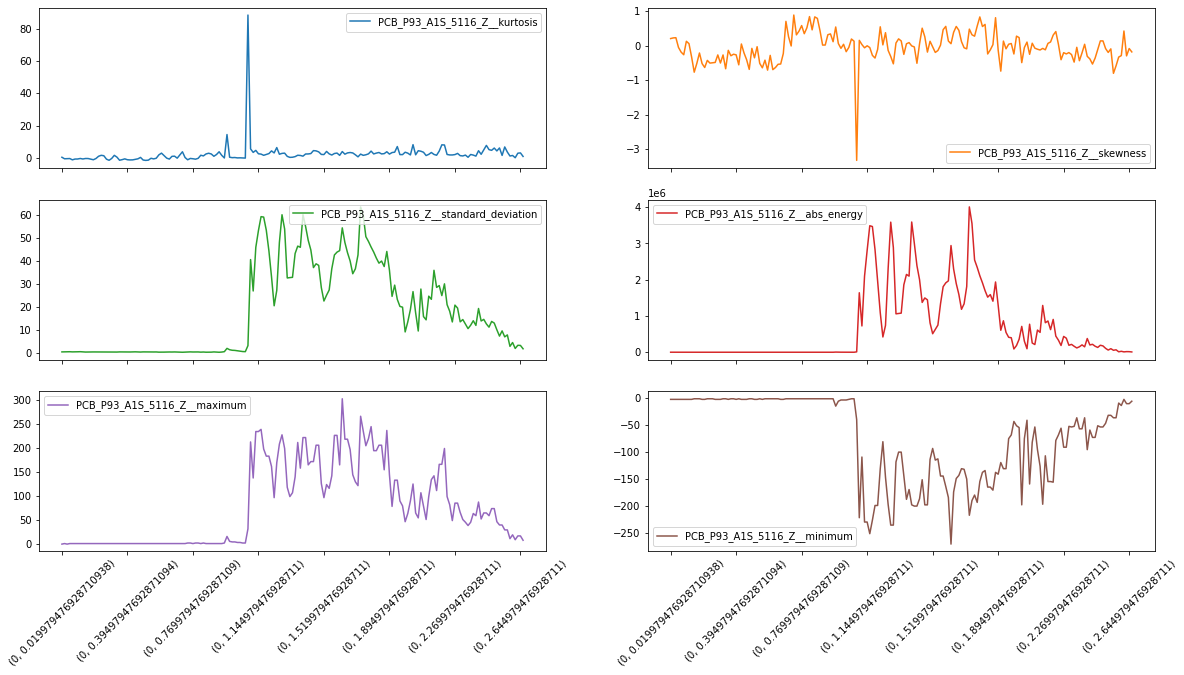

In [12]:
plot_features(features)

## Data Cleaning using tsfresh and pyLife

In [13]:
# First we calculate the sample frequency 
fs = round(1/np.mean(np.diff(ts_df.index.values)))
print("Original sample frequency is {0:d} Hz".format(fs))
# You can down sample your data using 
fs_new = 16384
ts_resampled_df = pts.resample_acc(ts_df,fs_new)
print("New sample frequency is {0:d} Hz".format(round(1/np.mean(np.diff(ts_resampled_df.index.values)))))

Original sample frequency is 50000 Hz
New sample frequency is 16384 Hz


<AxesSubplot:>

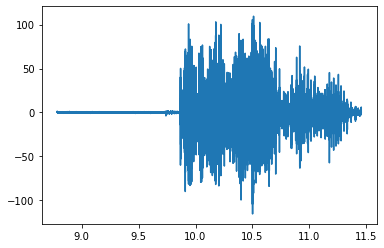

In [14]:
# Banpdass:
ts_bandpass_df = pts.butter_bandpass(ts_resampled_df,20,2000,fs_new)
ts_bandpass_df[col].plot()

In [16]:
# And now we can clean the time series
ts_cleaned_df = pts.clean_timeseries(ts_bandpass_df,col,
                                    percentage_max=0.05)

C:\python\pyLife\_venv\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
Feature Extraction: 100%|███████████████████████████████████████████████████████| 2808/2808 [00:00<00:00, 12404.33it/s]


IndexError: index 43860 is out of bounds for axis 0 with size 43860

In [ ]:
ts_cl

In [ ]:
index_new

In [ ]:
1/np.mean(np.diff(index_new))

In [ ]:
df.shape

In [ ]:
len(index_new)

In [ ]:
2e5

In [ ]:
2**14